### Resampling and cost-sensitive methods

In [ ]:
# evaluate imbalanced classification model with different metrics
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0)
# split into train/test sets with same class ratio
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, stratify=y)
# define model
model = LogisticRegression(solver='liblinear')
# fit model
model.fit(trainX, trainy)
# predict on test set
yhat = model.predict(testX)
# evaluate predictions
print('Accuracy: %.3f' % accuracy_score(testy, yhat))
print('Precision: %.3f' % precision_score(testy, yhat))
print('Recall: %.3f' % recall_score(testy, yhat))
print('F-measure: %.3f' % f1_score(testy, yhat))

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy=0.5)

# fit and apply the transform
X_under, y_under = undersample.fit_resample(X, y)

In [ ]:
from imblearn.over_sampling import SMOTE

# define oversample strategy
oversample = SMOTE(sampling_strategy=0.5)

# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)

In [ ]:
from imblearn.combine import SMOTEENN

# define sampling strategy
sample = SMOTEENN(sampling_strategy=0.5)

# fit and apply the transform
X_over, y_over = sample.fit_resample(X, y)

The scikit-learn library provides this capability for a range of algorithms via the class_weight attribute specified when defining the model. A weighting can be specified that is inversely proportional to the class distribution.

If the class distribution was 0.99 to 0.01 for the majority and minority classes, then the class_weight argument could be defined as a dictionary that defines a penalty of 0.01 for errors made for the majority class and a penalty of 0.99 for errors made with the minority class, e.g. {0:0.01, 1:0.99}.

In [ ]:
# define model
model = LogisticRegression(solver='liblinear', class_weight='balanced')

### Class Algos

### Eval Metrics

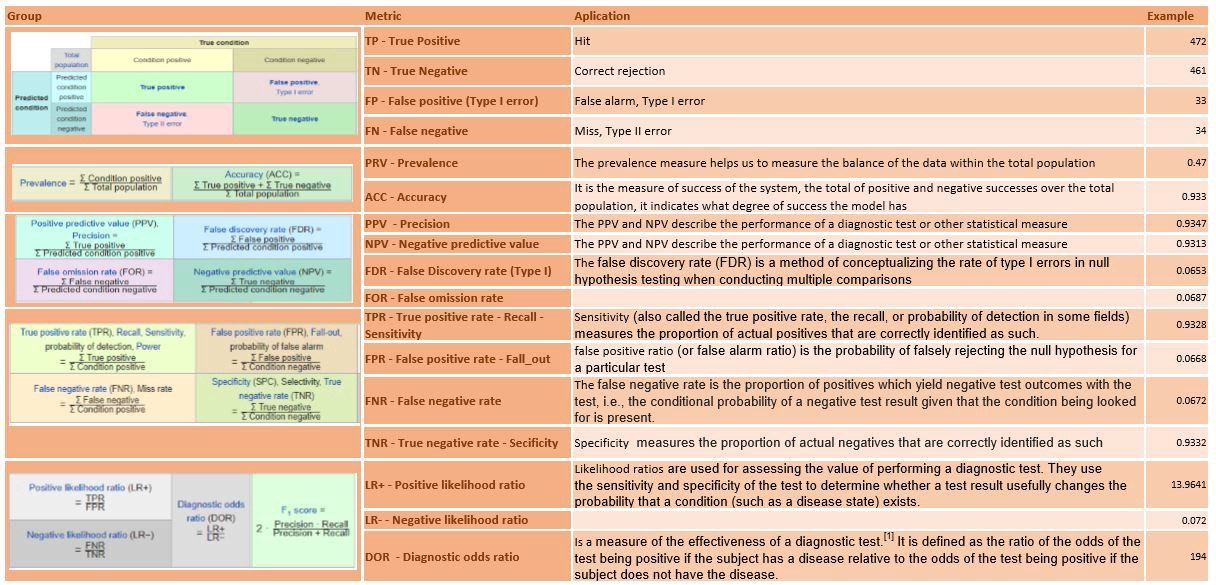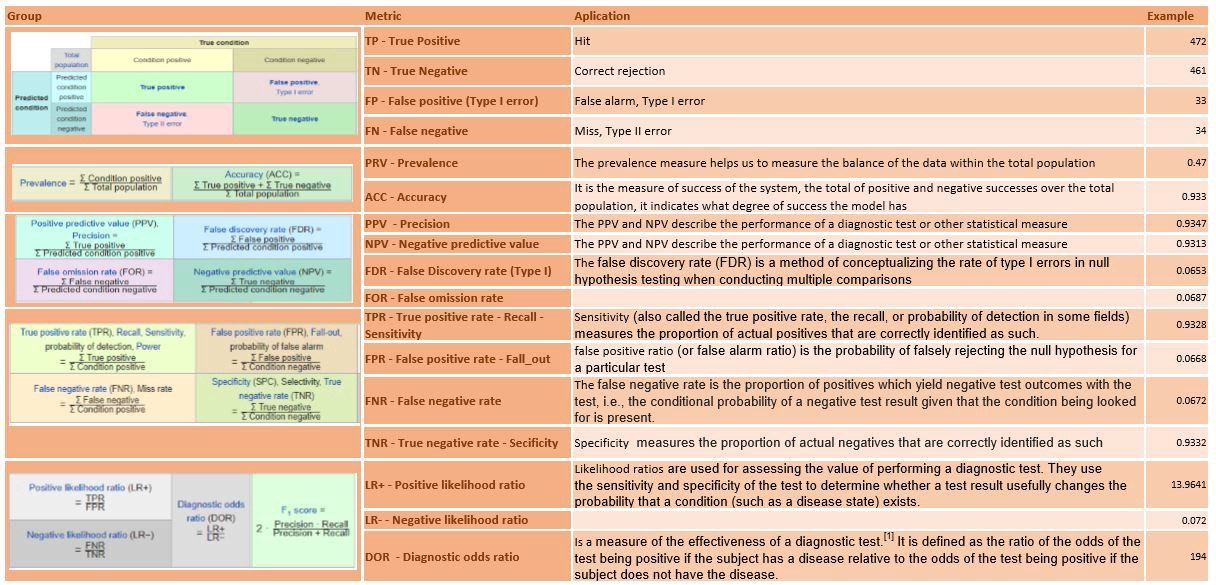

In [3]:
# Evaluate model
from sklearn import metrics
def evaluate_model(model, x_test, y_test):
    
    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [ ]:
# Decision Tree
from sklearn import tree

# Building Decision Tree model 
dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

# Evaluate 
dtc_eval = evaluate_model(dtc, X_test, y_test)

In [ ]:
# Random forest
from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model 
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

# evaluate
rf_eval = evaluate_model(rf, X_test, y_test)

In [ ]:
# NAIVE BAYES
from sklearn.naive_bayes import GaussianNB

# Building Naive Bayes model 
nb = GaussianNB()
nb.fit(X_train, y_train)
# Evaluate Model
nb_eval = evaluate_model(nb, X_test, y_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Building KNN model 
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# evaluate
knn_eval = evaluate_model(knn, X_test, y_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

#evaluate
lr_eval = evaluate_model(lr, X_test, y_test)